## Лабораторная работа № 6. Решение моделей в непрерывном и дискретном времени.

### **6.1. Цель работы**
1- Основной целью работы является освоение специализированных пакетов для решения
задач в непрерывном и дискретном времени.

## **6.2. Предварительные сведения**
### **6.2.1. Решение обыкновенных дифференциальных уравнений**

Напомним, что обыкновенное дифференциальное уравнение (ОДУ) описывает изменение некоторой переменной 𝑢:
```𝑢′(𝑡) = 𝑓(𝑢(𝑡), 𝑝, 𝑡), где 𝑓(𝑢(𝑡), 𝑝, 𝑡)``` — нелинейная модель (функция) изменения ```𝑢(𝑡)``` с заданным начальным
значением ```𝑢(𝑡0) = 𝑢0```, 𝑝 — параметры модели, 𝑡 — время. Для решения обыкновенных дифференциальных уравнений (ОДУ) в Julia можно ис-
пользовать пакет diffrentialEquations.jl.

### **6.2.1.1. Модель экспоненциального роста**
Рассмотрим пример использования этого пакета для решение уравнения модели экспоненциального роста, описываемую уравнением:
```𝑢′(𝑡) = 𝑎𝑢(𝑡), 𝑢(0) = 𝑢0.```
где 𝑎 — коэффициент роста.
Предположим, что заданы следующие начальные данные ```𝑎 = 0, 98, 𝑢(0) = 1, 0, 𝑡 ∈ [0; 1, 0].```
Аналитическое решение модели имеет вид:
```𝑢(𝑡) = 𝑢0 exp(𝑎𝑡)𝑢(𝑡).```

In [2]:
import Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `C:\Users\Meric\.julia\registries\General.toml`
   Resolving package versions...
   Installed TreeViews ──────────────────────── v0.3.0
   Installed Sundials_jll ───────────────────── v5.2.1+0
   Installed EnumX ──────────────────────────── v1.0.4
   Installed DifferentialEquations ──────────── v7.6.0
   Installed Polyester ──────────────────────── v0.6.20
   Installed OffsetArrays ───────────────────── v1.12.10
   Installed RecursiveArrayTools ────────────── v2.32.3
   Installed CEnum ──────────────────────────── v0.4.2
   Installed StaticArrays ───────────────────── v1.8.0
   Installed FunctionWrappers ───────────────── v1.1.3
   Installed TriangularSolve ────────────────── v0.1.20
   Installed ArrayInterfaceOffsetArrays ─────── v0.1.7
   Installed ZygoteRules ────────────────────── v0.2.4
   Installed Static ─────────────────────────── v0.8.8
   Installed Distances ──────────────────────── v0.10.11
   Installed SLEEFPirates ───────────────────── v0.6.42
   I

In [5]:
using DifferentialEquations

In [6]:
a = 0.98
f(u,p,t) = a*u
u0 = 1.0
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436334555072
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384867968267
 2.664456142481423

In [7]:
using Plots

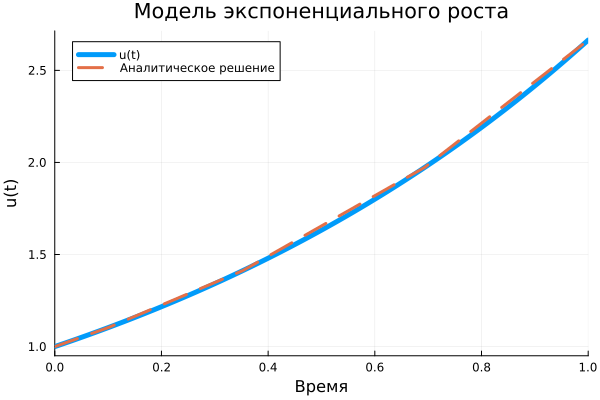

In [8]:
plot(sol, linewidth=5,title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="u(t)")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,label="Аналитическое решение")

In [9]:
sol = solve(prob,abstol=1e-8,reltol=1e-8)
println(sol)

ODESolution{Float64, 1, Vector{Float64}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Float64}}, ODEProblem{Float64, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, CompositeAlgorithm{Tuple{Vern7, Rodas4{0, false, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, true, nothing}}, OrdinaryDiffEq.AutoSwitchCache{Vern7, Rodas4{0, false, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, true, nothing}, Rational{Int64}, Int64}}, OrdinaryDiffEq.CompositeInterpolationData{ODEFunction{false, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothin

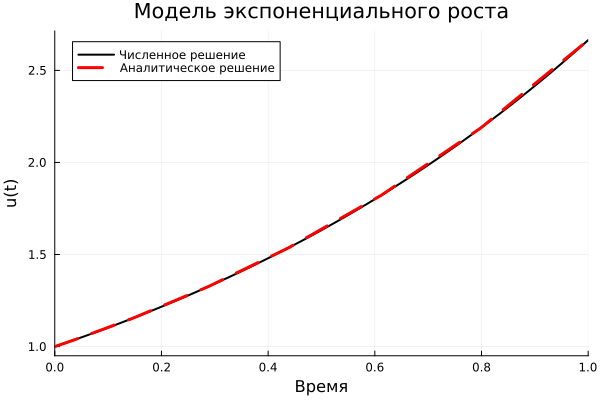

In [10]:
plot(sol, lw=2, color="black", title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="Численное решение")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,color="red",label="Аналитическое решение")

### **6.2.1.2. Система Лоренца**
Динамической системой Лоренца является нелинейная автономная система обыкно-
венных дифференциальных уравнений третьего порядка:
```𝑥 = 𝜎(𝑦 − 𝑥),̇𝑦 = 𝜌𝑥 − 𝑦 − 𝑥𝑧,̇𝑧 = 𝑥𝑦 − 𝛽𝑧,```
где 𝜎, 𝜌 и 𝛽 — параметры системы (некоторые положительные числа, обычно указывают (𝜎 = 10, 𝜌 = 28 и 𝛽 = 8/3).
Система получена из системы уравнений Навье–Стокса и описывает движение воздушных потоков в плоском слое жидкости постоянной толщины при разложении
скорости течения и температуры в двойные ряды Фурье с последующем усечением до первых-вторых гармоник.
Решение системы неустойчиво на аттракторе, что не позволяет применять клас- сические численные методы на больших отрезках времени, требуется использовать
высокоточные вычисления. Численное решение в Julia будет иметь следующий вид:

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


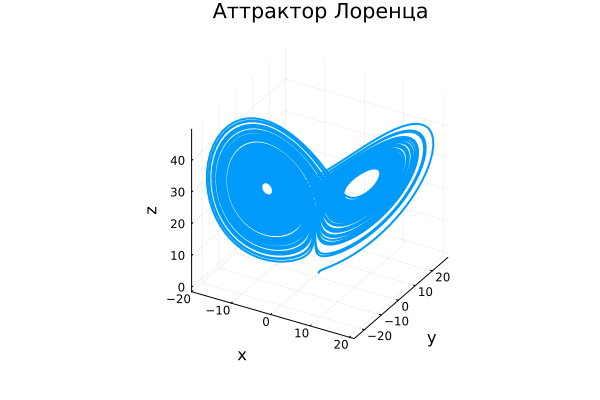

In [11]:
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end
u0 = [1.0,0.0,0.0]
p = (10,28,8/3)
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)
plot(sol, vars=(1,2,3), lw=2, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z",legend=false)

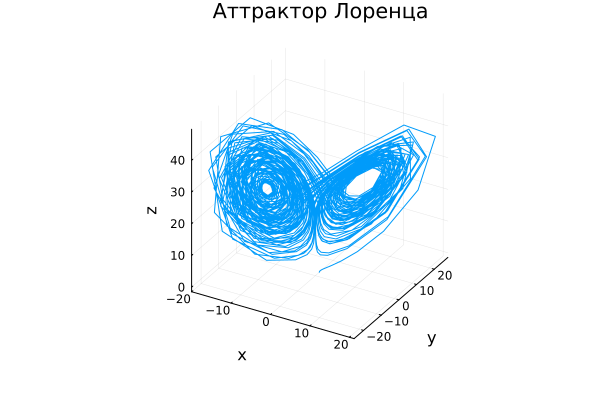

In [12]:
plot(sol,vars=(1,2,3),denseplot=false, lw=1, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z",legend=false)

### **6.2.2. Модель Лотки–Вольтерры**
Модель Лотки–Вольтерры описывает взаимодействие двух видов типа «хищник – жертва»:
```𝑥 = (𝛼 − 𝛽𝑦)𝑥,̇𝑦 = (−𝛾 + 𝛿𝑥)𝑦```
где 𝑥 — количество жертв, 𝑦 — количество хищников, 𝑡 — время, 𝛼, 𝛽, 𝛾, 𝛿 — коэффициенты, отражающие взаимодействия между видами (в данном случае 𝛼 — коэффициент рождаемости жертв, 𝛾 — коэффициент убыли хищников, 𝛽 — коэффициент убыли жертв в результате взаимодействия с хищниками, 𝛿 — коэффициент роста численности хищников).

In [14]:
import Pkg
Pkg.add("ParameterizedFunctions")

   Resolving package versions...
   Installed Referenceables ────────── v0.1.2
   Installed Bijections ────────────── v0.1.6
   Installed TimerOutputs ──────────── v0.5.23
   Installed InitialValues ─────────── v0.3.1
   Installed LabelledArrays ────────── v1.13.0
   Installed MutableArithmetics ────── v1.4.0
   Installed DomainSets ────────────── v0.5.14
   Installed AutoHashEquals ────────── v0.2.0
   Installed CompositeTypes ────────── v0.1.3
   Installed MultivariatePolynomials ─ v0.4.7
   Installed ThreadsX ──────────────── v0.1.11
   Installed MicroCollections ──────── v0.1.4
   Installed JuliaFormatter ────────── v1.0.45
   Installed Symbolics ─────────────── v4.14.0
   Installed DefineSingletons ──────── v0.1.2
   Installed Glob ──────────────────── v1.3.1
   Installed ArgCheck ──────────────── v2.3.0
   Installed DynamicPolynomials ────── v0.4.6
   Installed CommonMark ────────────── v0.8.12
   Installed BangBang ──────────────── v0.3.39
   Installed ParameterizedFunctions ── 

In [15]:
using ParameterizedFunctions

[ Info: Precompiling ParameterizedFunctions [65888b18-ceab-5e60-b2b9-181511a3b968]
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

[ Info: Precompiling UnitfulExt [0e51ec96-f580-5f12-a625-1297083d7970]


┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141


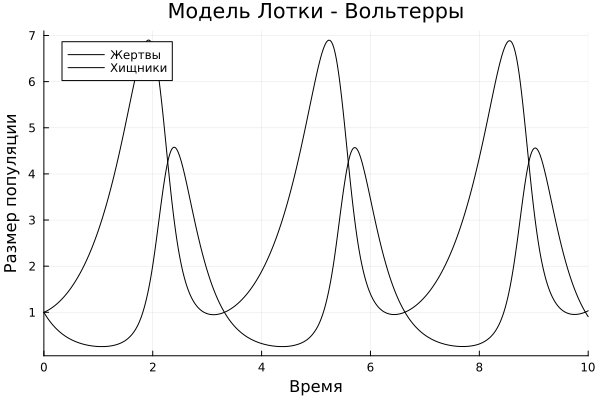

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141


In [17]:
lv! = @ode_def LotkaVolterra begin
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
end a b c d
u0 = [1.0,1.0]
p = (1.5,1.0,3.0,1.0)
tspan = (0.0,10.0)
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)
plot(sol, label = ["Жертвы" "Хищники"], color="black", ls=[:solid], title="Модель Лотки - Вольтерры", xaxis="Время",yaxis="Размер популяции")

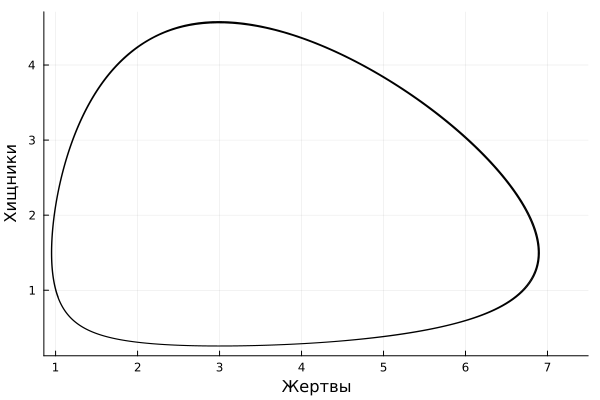

In [18]:
plot(sol,vars=(1,2), color="black", xaxis="Жертвы",yaxis="Хищники", legend=false)

### **6.4. Задания для самостоятельного выполнения**

1. Реализовать и проанализировать модель роста численности изолированной популя-
ции (модель Мальтуса):̇𝑥 = 𝑎𝑥, 𝑎 = 𝑏 − 𝑐.
где 𝑥(𝑡) — численность изолированной популяции в момент времени 𝑡, 𝑎 — коэффициент роста популяции, 𝑏 — коэффициент рождаемости, 𝑐 — коэффициент смертности. Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией).

In [ ]:
lv! = @ode_def Malthus begin
    dx = a*x
end a
u0 = [2]
b = 3.0
c = 1.0
p = (b - c)
tspan = (0.0, 3.0)
prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)

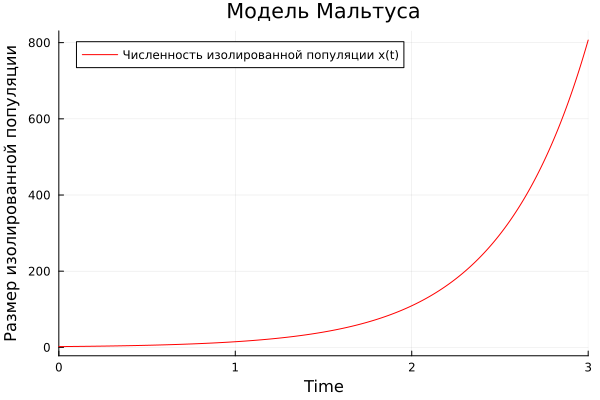

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141


In [21]:
plot(sol, label = "Численность изолированной популяции x(t)", color="red", ls=[:solid], title="Модель Мальтуса", xaxis = "Time", yaxis = "Размер изолированной популяции")

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:2000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:3000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:4000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:5000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:6000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indic

Plots.AnimatedGif("C:\\Users\\Meric\\maltus.gif")
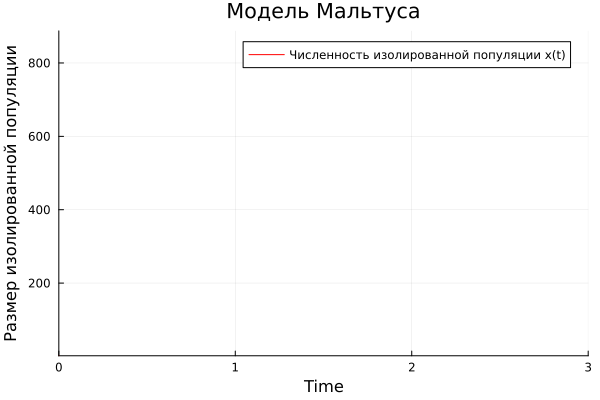

In [23]:
animate(sol, fps=7, "maltus.gif", label = "Численность изолированной популяции x(t)", color="red", ls=[:solid], title="Модель Мальтуса", xaxis = "Time", yaxis = "Размер изолированной популяции")

2. Реализовать и проанализировать логистическую модель роста популяции, заданную уравнением: 𝑥 = 𝑟𝑥 (1 − 𝑥
𝑘 ) , 𝑟 > 0, 𝑘 > 0, 𝑟 — коэффициент роста популяции, 𝑘 — потенциальная ёмкость экологической системы (предельное значение численности популяции). Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией).

In [ ]:
lv! = @ode_def Logistic_population begin
    dx = r*x*(1 - x/k)
end r k
u0 = [1.0]
p = [0.9, 20]
tspan = (0.0, 10.0)

prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)

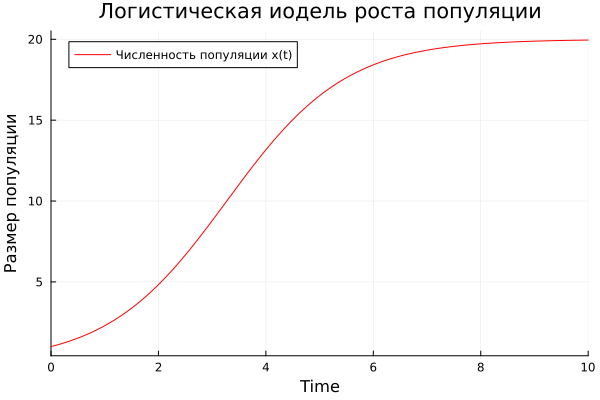

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141


In [25]:
plot(sol, label = "Численность популяции x(t)", color="red", ls=[:solid], title="Логистическая иодель роста популяции", xaxis = "Time", yaxis = "Размер популяции")

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:2000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:3000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:4000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:5000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:6000.
└ @ Plots C:\Users\Meric\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indic

Plots.AnimatedGif("C:\\Users\\Meric\\logistic.gif")
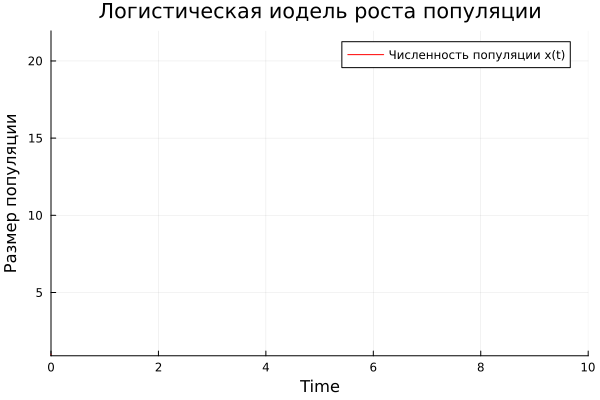

In [26]:
animate(sol, fps=7, "logistic.gif", label = "Численность популяции x(t)", color="red", ls=[:solid], title="Логистическая иодель роста популяции", xaxis = "Time", yaxis = "Размер популяции")

3. Реализовать и проанализировать модель эпидемии Кермака–Маккендрика (SIR-модель):
𝑠 = −𝛽𝑖𝑠,̇
𝑖 = 𝛽𝑖𝑠 − 𝜈𝑖,̇
𝑟 = 𝜈𝑖,
где 𝑠(𝑡) — численность восприимчивых к болезни индивидов в момент времени 𝑡, 𝑖(𝑡) — численность инфицированных индивидов в момент времени 𝑡, 𝑟(𝑡) — численность переболевших индивидов в момент времени 𝑡, 𝛽 — коэффициент интен- сивности контактов индивидов с последующим инфицированием, 𝜈 — коэффициент интенсивности выздоровления инфицированных индивидов. Численность популяции считается постоянной, т.е.̇ 𝑠 +̇ 𝑖 +̇ 𝑟 = 0. Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией).

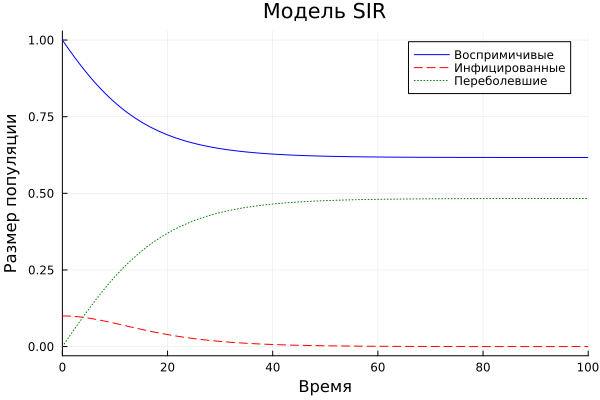

In [27]:
lv! = @ode_def SIR begin
    ds = - b*i*s
    di = b*i*s - v*i
    dr = v*i
end b v
u0 = [1.0, 0.1, 0]
p = (0.25, 0.25)
tspan = (0.0, 100.0)
prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)
plot(sol, label = ["Воспримичивые" "Инфицированные" "Переболевшие"],
    color = ["blue" "red" "green"], ls = [:solid :dash :dot],
    title = "Модель SIR", xaxis = "Время", yaxis = "Размер популяции")

Plots.AnimatedGif("C:\\Users\\Meric\\SIR.gif")
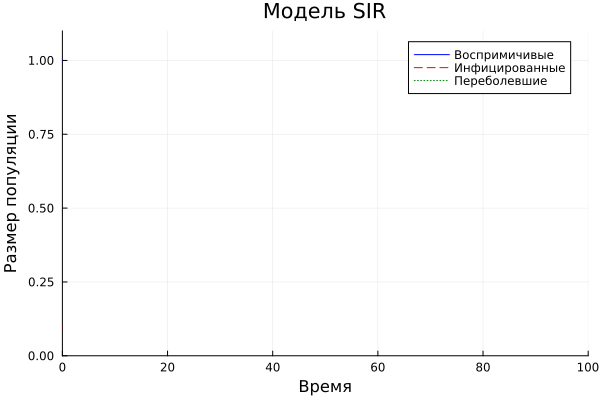

In [28]:
animate(sol, fps=3, "SIR.gif", label = ["Воспримичивые" "Инфицированные" "Переболевшие"],
    color = ["blue" "red" "green"], ls = [:solid :dash :dot],
    title = "Модель SIR", xaxis = "Время", yaxis = "Размер популяции")

4. Как расширение модели SIR (Susceptible-Infected-Removed) по результатом эпидемии испанки была предложена модель SEIR (Susceptible-Exposed-Infected-Removed):
Размер популяции сохраняется: 𝑠(𝑡) + 𝑒(𝑡) + 𝑖(𝑡) + 𝑟(𝑡) = 𝑁 . Исследуйте, сравните с SIR.

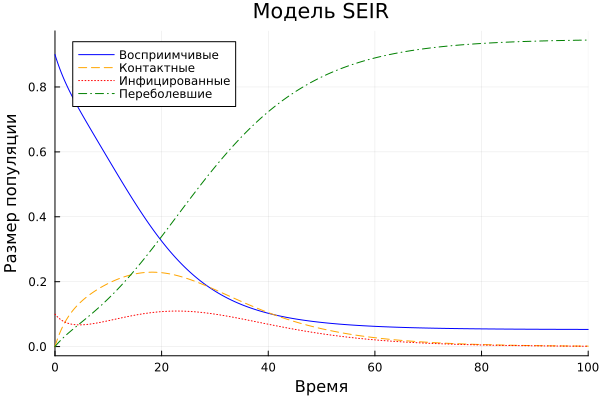

In [29]:
M = 1.0

lv! = @ode_def SEIR begin
ds = -(β/M)*s*i
de = (β/M)*s*i - δ*e
di = δ*e - γ*i
dr = γ*i
end β γ δ

initialInfect = 0.1
u0 = [(M - initialInfect), 0.0, initialInfect, 0.0]
p = (0.6, 0.2, 0.1)
tspan = (0.0, 100.0)

prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)
plot(sol, label = ["Восприимчивые" "Контактные" "Инфицированные" "Переболевшие"], 
    color=["blue" "orange" "red" "green"], ls=[:solid :dash :dot :dashdot],
    title="Модель SEIR",
    xaxis="Время",yaxis="Размер популяции")

Plots.AnimatedGif("C:\\Users\\Meric\\SEIR.gif")
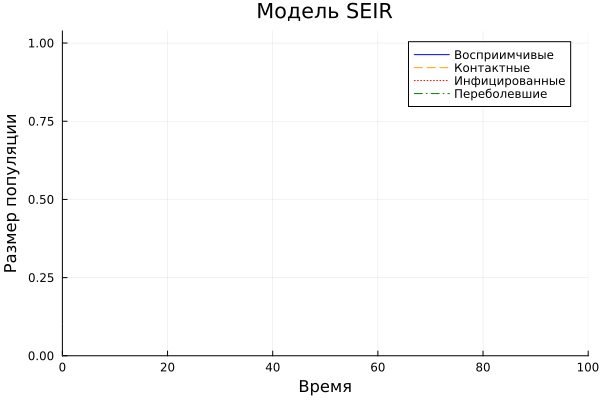

In [31]:
animate(sol, fps=3, "SEIR.gif", label = ["Восприимчивые" "Контактные" "Инфицированные" "Переболевшие"], 
    color=["blue" "orange" "red" "green"], ls=[:solid :dash :dot :dashdot],
    title="Модель SEIR",
    xaxis="Время",yaxis="Размер популяции")

5. Для дискретной модели Лотки–Вольтерры:
с начальными данными 𝑎 = 2, 𝑐 = 1, 𝑑 = 5 найдите точку равновесия. Получите и сравните аналитическое и численное решения. Численное решение изобразите на фазовом портрете.

In [32]:
using Pkg
Pkg.add("LaTeXStrings")

   Resolving package versions...
    Updating `C:\Users\Meric\.julia\environments\v1.9\Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.1
  No Changes to `C:\Users\Meric\.julia\environments\v1.9\Manifest.toml`


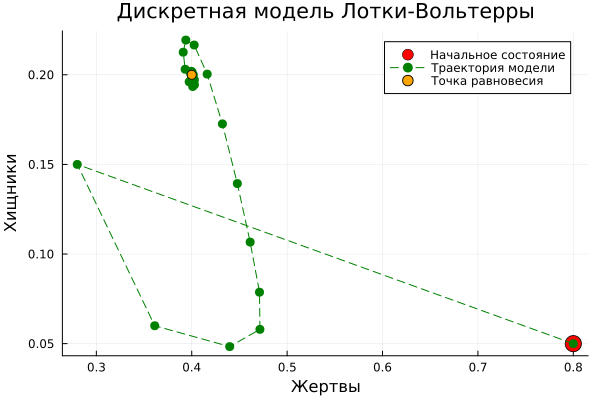

In [34]:
using LaTeXStrings
a, c, d = 2, 1, 5
next(x1,x2) = [(a*x1*(1-x1) - x1*x2), (-c*x2 + d*x1*x2)]
bp = [(1+c)/d, (d*(a -1)-a*(1 + c))/d]
u0 = [0.8, 0.05]
mt = 100
simT = Array{Union{Nothing, Array}}(nothing, mt)
for t in 1:mt
    simT[t] = []
    if(t == 1)
        simT[t] = u0
    else
        simT[t] = next(simT[t-1]...)
    end
end
scatter([simT[1][1]], [simT[1][2]], 
    c=:red, ms=9, label="Начальное состояние")

plot!(first.(simT), last.(simT), color=:green, linestyle=:dash, 
    marker = (:dot, 5, Plots.stroke(0)), label="Траектория модели", title = "Дискретная модель Лотки-Вольтерры")

scatter!([bp[1]], [bp[2]], color=:orange, markersize=5, 
    label="Точка равновесия", 
    xlabel="Жертвы", ylabel="Хищники")

[ Info: Saved animation to C:\Users\Meric\lotkav.gif


Plots.AnimatedGif("C:\\Users\\Meric\\lotkav.gif")
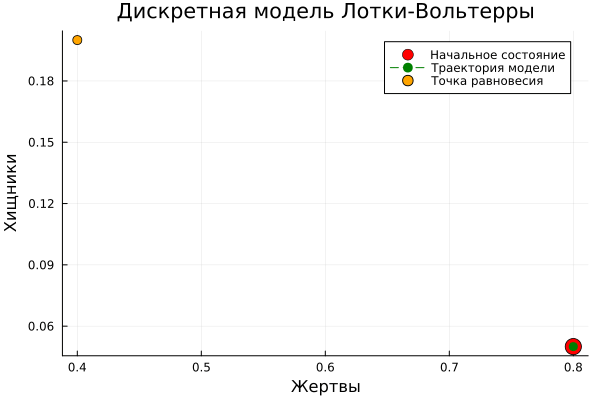

In [35]:
n = 100
anim = @animate for i in 1:n
    mt = (i)
    a, c, d = 2, 1, 5
    next(x1,x2) = [(a*x1*(1-x1) - x1*x2), (-c*x2 + d*x1*x2)]
    bp = [(1+c)/d, (d*(a -1)-a*(1 + c))/d]
    u0 = [0.8, 0.05]
    simT = Array{Union{Nothing, Array}}(nothing, mt)
    for t in 1:mt
        simT[t] = []
        if(t == 1)
            simT[t] = u0
        else
            simT[t] = next(simT[t-1]...)
        end
    end
    scatter([simT[1][1]], [simT[1][2]], 
            c=:red, ms=9, label="Начальное состояние")

    plot!(first.(simT), last.(simT), color=:green, linestyle=:dash, 
            marker = (:dot, 5, Plots.stroke(0)), label="Траектория модели", title = "Дискретная модель Лотки-Вольтерры")

    scatter!([bp[1]], [bp[2]], color=:orange, markersize=5, 
            label="Точка равновесия", 
            xlabel="Жертвы", ylabel="Хищники")
end
gif(anim, "lotkav.gif", fps=7)

6. Реализовать на языке Julia модель отбора на основе конкурентных отношений:
Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией) и фазовый портрет.

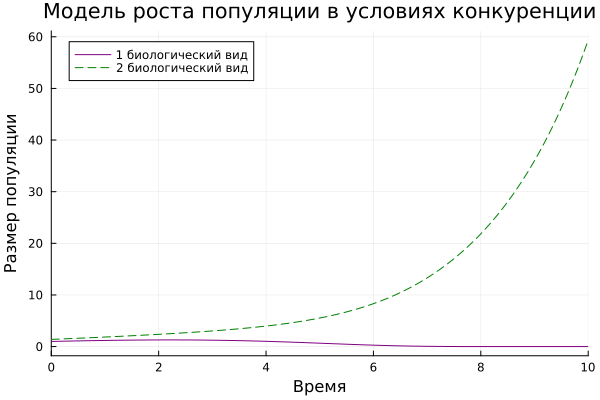

In [36]:
lv! = @ode_def CompetitiveSelectionModel begin
dx = a*x - b*x*y
dy = a*y - b*x*y
    end a b
u0 = [1.0, 1.4]
p = (0.5, 0.2)
tspan = (0.0, 10.0)
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)
plot(sol, label = ["1 биологический вид" "2 биологический вид"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель роста популяции в условиях конкуренции",
    xaxis="Время",yaxis="Размер популяции")

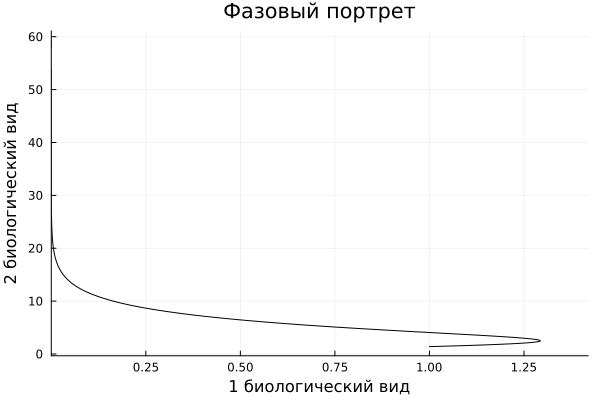

In [37]:
plot(sol, vars=(1,2), color="black", title="Фазовый портрет", 
    xaxis="1 биологический вид", yaxis="2 биологический вид", legend=false)

Plots.AnimatedGif("C:\\Users\\Meric\\CompetitiveSelectionModel.gif")
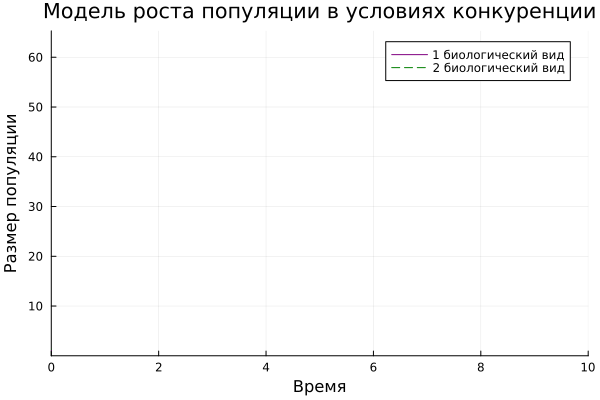

In [38]:
animate(sol, fps=7, "CompetitiveSelectionModel.gif", label = ["1 биологический вид" "2 биологический вид"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель роста популяции в условиях конкуренции",
    xaxis="Время",yaxis="Размер популяции")

7. Реализовать на языке Julia модель консервативного гармонического осциллятора.
где 𝜔0 — циклическая частота. Начальные параметры подобрать самостоятельно, выбор пояснить. Построить соответствующие графики (в том числе с анимацией) и фазовый портрет.

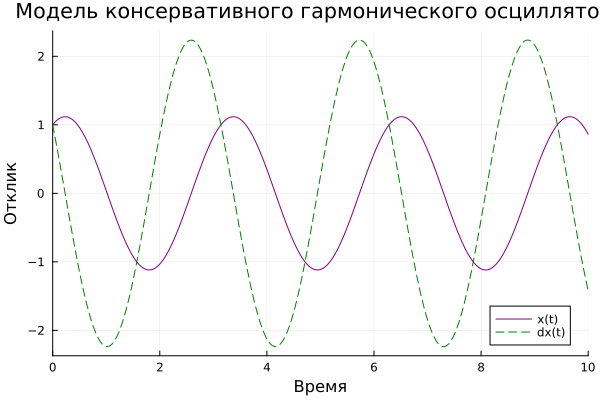

In [40]:
lv! = @ode_def classicOscillator begin
    dx = y
    dy = -(w0^2)*x
end w0
u0 = [1.0, 1.0]
p = (2.0)
tspan = (0.0, 10.0)
prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)
plot(sol, label = ["x(t)" "dx(t)"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель консервативного гармонического осциллятора",
    xaxis="Время",yaxis="Отклик")

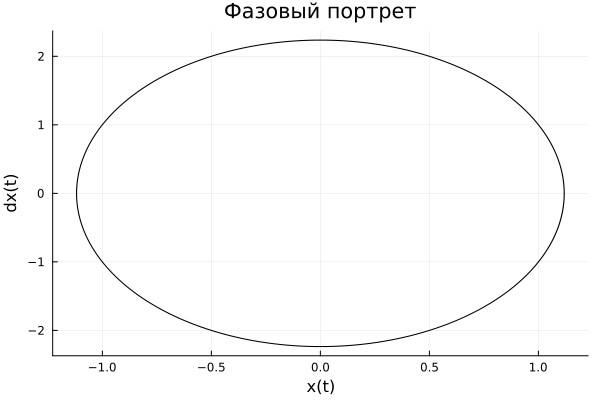

In [41]:
plot(sol, vars=(1,2), color="black", title="Фазовый портрет", xaxis="x(t)", yaxis="dx(t)", legend=false)

Plots.AnimatedGif("C:\\Users\\Meric\\harmonic_oscillator_model.gif")
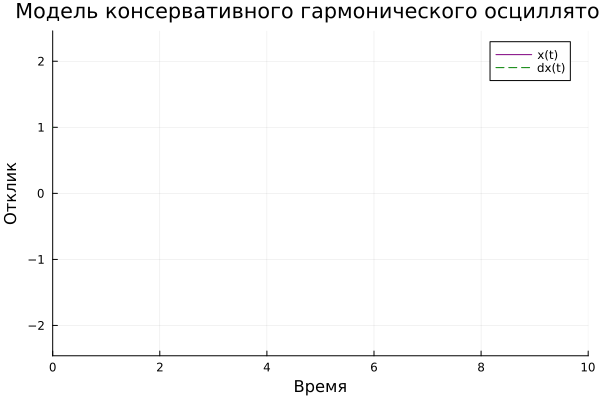

In [42]:
animate(sol, fps=7, "harmonic.gif", label = ["x(t)" "dx(t)"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель консервативного гармонического осциллятора",
    xaxis="Время",yaxis="Отклик")

8. Реализовать на языке Julia модель свободных колебаний гармонического осциллятора. где 𝜔0 — циклическая частота, 𝛾 — параметр, характеризующий потери энергии. Начальные параметры подобрать самостоятельно, выбор пояснить. Построить соответствующие графики (в том числе с анимацией) и фазовый портрет.

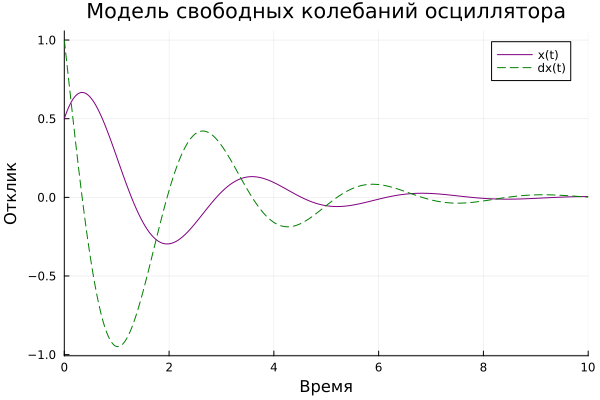

In [43]:
lv! = @ode_def classicOscillator begin
    dx = y
    dy = -2*v*y - (w0^2)*x
end v w0
u0 = [0.5, 1.0]
p = (0.5), 2.0
tspan = (0.0, 10.0)
prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)
plot(sol, label = ["x(t)" "dx(t)"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель свободных колебаний осциллятора",
    xaxis="Время",yaxis="Отклик")

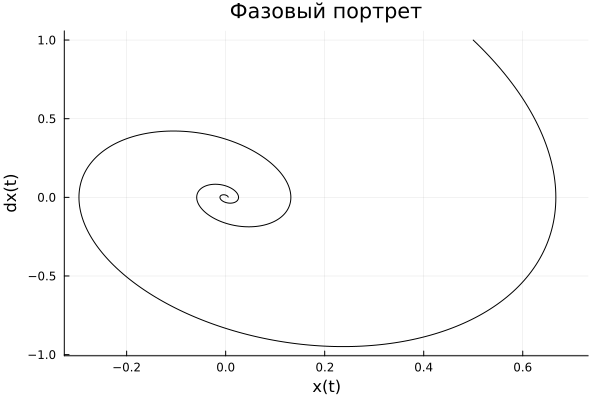

In [44]:
plot(sol, vars=(1,2), color="black", title="Фазовый портрет", xaxis="x(t)", yaxis="dx(t)", legend=false)

Plots.AnimatedGif("C:\\Users\\Meric\\harmonic2.gif")
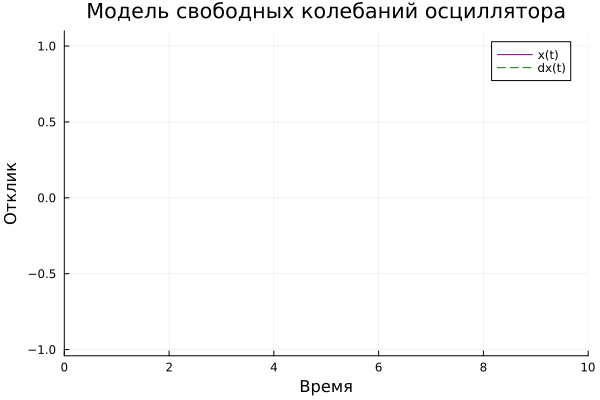

In [46]:
animate(sol, fps=7, "harmonic2.gif", label = ["x(t)" "dx(t)"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель свободных колебаний осциллятора",
    xaxis="Время",yaxis="Отклик")